# Exploratory Data Analysis: Global Countries Information Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

#### Load the prepared countries.csv file and view the first 5 rows.

In [2]:
countries = pd.read_csv('countries.csv')

countries.head(5)

,country,density_pkm2,abbreviation,agricultural_land_pct,land_area_km2,armed_forces_size,birth_rate,calling_code,capital_major_city,co2_emissions,...,oop_health_expend,physicians_per_thousand,population,pop_labor_force_participation_pct,tax_revenue_pct,total_tax_rate,unemployment_rate,urban_population,latitude,longitude
0,Afghanistan,60,AF,58.1,652230.0,323000.0,32.49,93.0,Kabul,8672.0,...,78.4,0.28,38041754.0,48.9,9.3,71.4,11.12,9797273.0,33.939110,67.709953
1,Albania,105,AL,43.1,28748.0,9000.0,11.78,355.0,Tirana,4536.0,...,56.9,1.20,2854191.0,55.7,18.6,36.6,12.33,1747593.0,41.153332,20.168331
2,Algeria,18,DZ,17.4,2381741.0,317000.0,24.28,213.0,Algiers,150006.0,...,28.1,1.72,43053054.0,41.2,37.2,66.1,11.70,31510100.0,28.033886,1.659626
3,Andorra,164,AD,40.0,468.0,NaN,7.20,376.0,Andorra la Vella,469.0,...,36.4,3.33,77142.0,NaN,NaN,NaN,NaN,67873.0,42.506285,1.521801
4,Angola,26,AO,47.5,1246700.0,117000.0,40.73,244.0,Luanda,34693.0,...,33.4,0.21,31825295.0,77.5,9.2,49.1,6.89,21061025.0,-11.202692,17.873887


#### Let's look at the carbon dioxide emissions feature. First, compute the descriptive statistics.

In [3]:
# descriptive statistics of co2_emissions
print(countries['co2_emissions'].describe())

count    1.880000e+02
mean     1.777992e+05
std      8.387903e+05
min      1.100000e+01
25%      2.304250e+03
50%      1.230300e+04
75%      6.388425e+04
max      9.893038e+06
Name: co2_emissions, dtype: float64


#### There are orders of magnitude difference between the minimum and maximum.
#### Are there any missing values in the co2_emissions column?

In [4]:
# compute number of missing values in co2_emissions column
print(countries['co2_emissions'].isna().sum())

# compute percentage of missing values in co2_emissions column
print(countries['co2_emissions'].isna().mean() * 100)

7
3.5897435897435894


#### 7 countries (3.6% of all entries) have missing values. Which countries?

In [5]:
# Which countries have no values in the co2_emissions column?
countries[countries['co2_emissions'].isna()][['country', 'co2_emissions']]

,country,co2_emissions
56,Eswatini,NaN
73,Vatican City,NaN
113,Monaco,NaN
120,Nauru,NaN
128,North Macedonia,NaN
133,Palestinian National Authority,NaN
149,San Marino,NaN


#### Now let's look at the Population feature. Compute descriptive statistics.

In [6]:
# descriptive statistics of population
print(countries['population'].describe())

count    1.940000e+02
mean     3.938116e+07
std      1.450924e+08
min      8.360000e+02
25%      1.962678e+06
50%      8.826588e+06
75%      2.858549e+07
max      1.397715e+09
Name: population, dtype: float64


#### There are orders of magnitude difference between the minimum and maximum.
#### Does Population have any missing values?

In [7]:
# compute number of missing values in population column
print(countries['population'].isna().sum())

# compute percentage of missing values in population column
print(countries['population'].isna().mean() * 100)

1
0.5128205128205128


#### Population has 1 missing value. Which country?

In [8]:
# Which countries have no values in the population column?
countries[countries['population'].isna()][['country', 'population']]

,country,population
133,Palestinian National Authority,NaN


#### Palestinian National Authority lacks data for population.
#### 3.6% of countries have missing values in the co2_emissions column. The percentage is small enough that removing these entries shouldn't have a significant effect on the exploratory data analysis. 

In [9]:
# drop entries with missing values in the co2_emissions column
countries = countries.dropna(subset=['co2_emissions'])

In [10]:
# verify the data frame dropped 7 entries
countries.shape

(188, 35)

In [11]:
# verify there are no missing values in co2_emissions column
print(countries['co2_emissions'].isna().sum())

0


#### A histogram will show the data distribution of carbon dioxide emissions.

<function matplotlib.pyplot.show(close=None, block=None)>

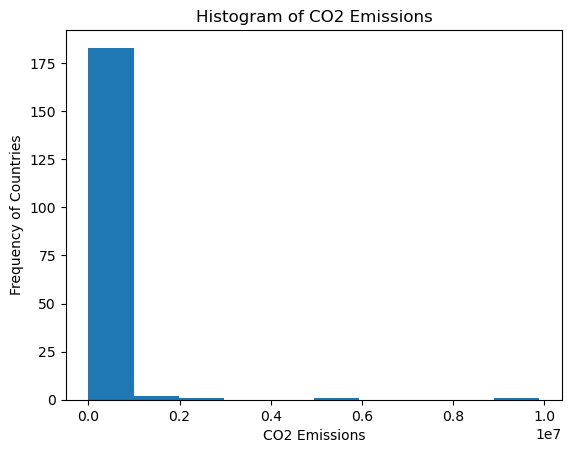

In [12]:
# plot histogram of co2_emissions
plt.hist(countries['co2_emissions'])
plt.title('Histogram of CO2 Emissions')
plt.xlabel('CO2 Emissions')
plt.ylabel('Frequency of Countries')
plt.show

#### Carbon dioxide emissions data is right-skewed. A few countries have large amounts of carbon dioxide emissions. 
#### What does the histogram of the Population feature look like?

<function matplotlib.pyplot.show(close=None, block=None)>

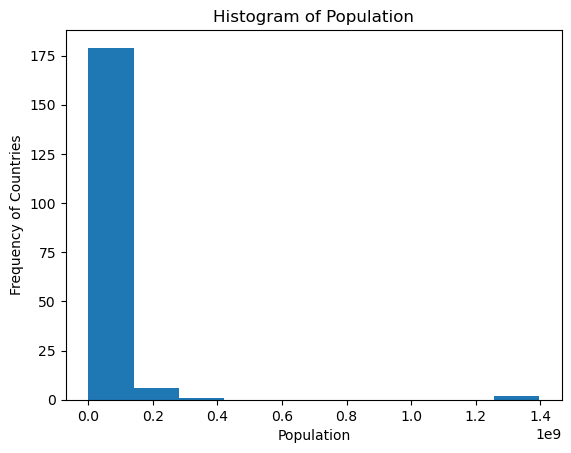

In [13]:
# plot histogram of population
plt.hist(countries['population'])
plt.title('Histogram of Population')
plt.xlabel('Population')
plt.ylabel('Frequency of Countries')
plt.show

#### Population data is also right-skewed with a few countries having very large populations.
#### A scatter plot with a linear regression line would show the relationship between population and carbon dioxide emissions.

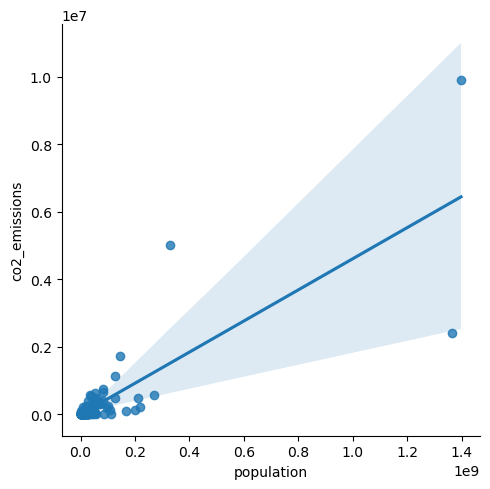

In [14]:
# with linear regression line
sns.lmplot(data=countries, x='population', y='co2_emissions')

#### The scatter plot shows a strong positive correlation. As population increases, carbon dioxide emissions also tend to increase.
#### As expected from the histograms, most data points lie on the low ends of the axes with just a few points on the large ends of the axes. Log-scaling both axes would make it easier to see the small values.

In [15]:
# Log Transformation 
countries['log_population'] = np.log(countries['population'])
countries['log_co2_emissions'] = np.log(countries['co2_emissions'])
#countries[['log_population', 'log_co2_emissions']].head()

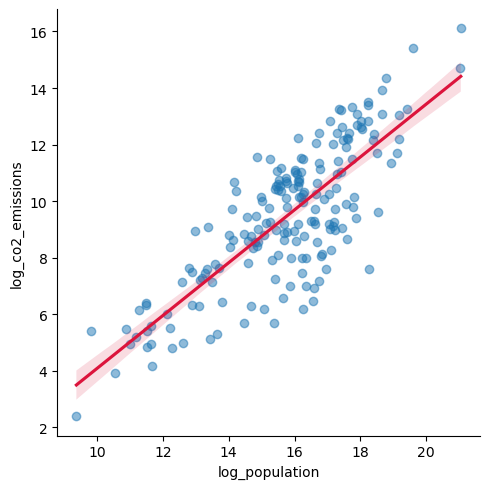

In [16]:
# scatterplot with linear regression line
sns.lmplot(data=countries, x='log_population',
           y='log_co2_emissions',
           scatter_kws={'alpha': 0.5},
           line_kws={'color': 'crimson'})

#### The log scaling makes it easier to see all data points and the positive correlation.
#### What is the correlation?

In [17]:
# compute correlation
log_pop_co2_correlation = countries['log_population'].corr(countries['log_co2_emissions'])
log_pop_co2_correlation

0.7997478579303685

#### There is a high correlation between population and carbon dioxide emissions.
#### Now let's look at carbon dioxide emissions per 1,000 people. Add a new column for CO2_per_1000capita, compute descriptive statistics, and plot a histogram.

In [18]:
# create new co2_per_1000capita feature
countries['co2_per_1000capita'] = countries['co2_emissions'] / countries['population'] * 1000

In [19]:
print(countries['co2_per_1000capita'].describe())

count    188.000000
mean       4.219642
std        5.369097
min        0.023286
25%        0.630123
50%        2.440754
75%        5.740800
max       36.460649
Name: co2_per_1000capita, dtype: float64


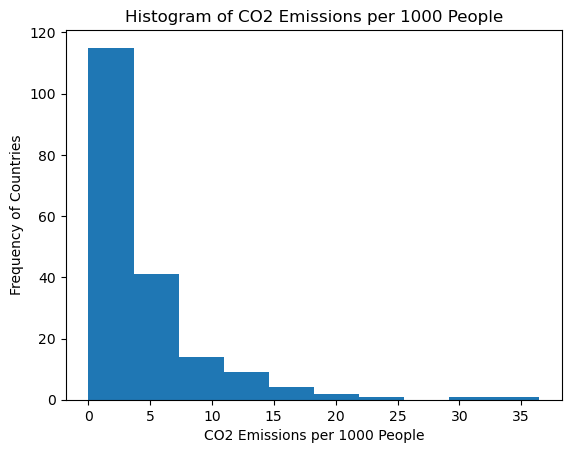

In [20]:
# histogram of carbon dioxide emissions per 1,000 people
plt.hist(countries['co2_per_1000capita'])
plt.title('Histogram of CO2 Emissions per 1000 People')
plt.xlabel('CO2 Emissions per 1000 People')
plt.ylabel('Frequency of Countries')
plt.show()

#### This histogram is right-skewed. Some countries have very high carbon dioxide emissions per 1,000 people.
#### A box plot will provide another perspective on this feature by showing us the quartiles, interquartile range, and outliers.

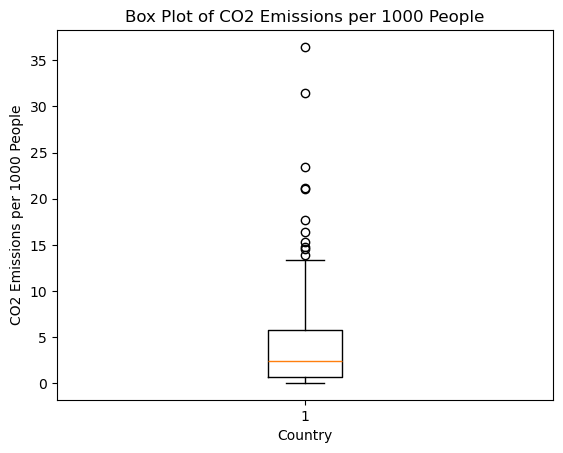

In [21]:
# box plot of carbon dioxide emissions per 1,000 people
plt.boxplot(countries['co2_per_1000capita'])
plt.title('Box Plot of CO2 Emissions per 1000 People')
plt.xlabel('Country')
plt.ylabel('CO2 Emissions per 1000 People')
plt.show()

#### The outliers are displayed in the box plot. Which countries are the outliers? Calculate the interquartile range and the lower and upper outlier bounds.

In [22]:
# determine which countries are outliers

# calculate interquartile range
Q1 = countries['co2_per_1000capita'].quantile(0.25)  # first quartile
Q3 = countries['co2_per_1000capita'].quantile(0.75)  # third quartile
IQR = Q3 - Q1  # interquartile range

# determine outlier thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# filter outliers
outliers = countries[
    (countries['co2_per_1000capita'] < lower_bound) |
    (countries['co2_per_1000capita'] > upper_bound)
]

# print outlier countries and their co2_per_1000capita, sorted by co2_per_1000capita descending
print(outliers[['country', 'co2_per_1000capita']].sort_values(by='co2_per_1000capita', ascending=False))

                  country  co2_per_1000capita
141                 Qatar           36.460649
177   Trinidad and Tobago           31.447204
90                 Kuwait           23.468517
184  United Arab Emirates           21.116973
12                Bahrain           21.106327
24                 Brunei           17.688127
151          Saudi Arabia           16.442171
186         United States           15.251978
32                 Canada           14.730057
8               Australia           14.588961
100            Luxembourg           13.926312


#### 11 countries are outliers with high carbon dioxide emissions per 1,000 people.
#### Use Plotly to visualize these countries on a map with a color scale representing the amount of carbon dioxide emissions per 1,000 people.

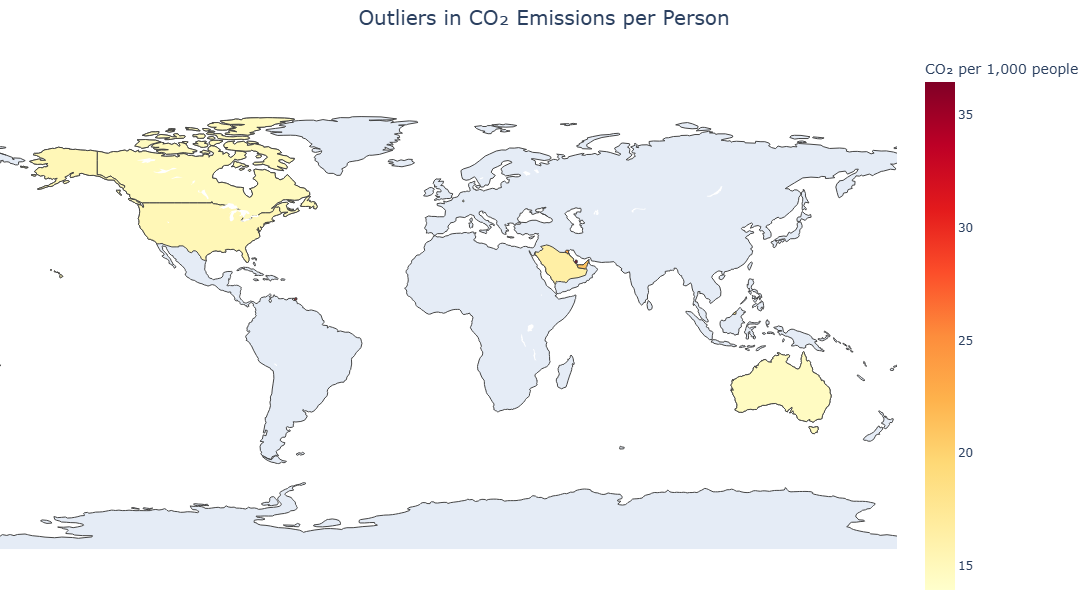

In [32]:
# set up choropleth
fig = px.choropleth(
    outliers,
    locations='country',
    locationmode='country names',
    color='co2_per_1000capita',
    color_continuous_scale='YlOrRd',
    hover_name='country',
    title='Outliers in CO₂ Emissions per Person'
)

fig.update_layout(
    geo=dict(
        showframe=False,
        showcoastlines=True,
        projection_type='equirectangular'
    ),
    margin=dict(l=0, r=0, t=50, b=0),
    
    coloraxis_colorbar=dict(
        title="CO₂ per 1,000 people"
    ),
    
    # Set custom figure size
    width=1000, height=600,
    
    # Center the title
    title=dict(  
        x=0.5,  
        xanchor='center',
        font=dict(size=20)
    )
)

fig.show()

# save plot to .html file
fig.write_html("plotly_choropleth.html")

#### The above is an interactive map but cannot be rendered on GitHub. Check out the interactive map [here](https://mcfeenix.github.io/Exploratory-Data-Analysis-with-Python/plotly_choropleth.html).
#### The top CO2 per capita emitting nations are geographically small and can only be seen while zoomed in. Additional work could focus on specific regions, such as the Middle East.
#### Let's look at the GDP feature and see how it relates to carbon dioxide emissions and population. First, are there any missing values?

In [24]:
# Are there any missing values in the GDP column?

# compute number of missing values in GDP column
print(countries['gdp'].isna().sum())

# compute percentage of missing values in GDP column
print(countries['gdp'].isna().mean() * 100)

0
0.0


#### No missing values. Calculate the descriptive statistics and plot a histogram.

In [25]:
# descriptive statistics for GDP
print(countries['gdp'].describe())

count    1.880000e+02
mean     4.898678e+11
std      2.199628e+12
min      4.727146e+07
25%      1.064606e+10
50%      3.866727e+10
75%      2.398869e+11
max      2.142770e+13
Name: gdp, dtype: float64


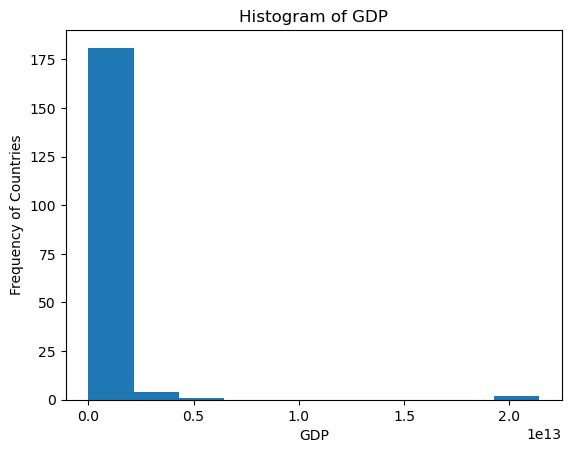

In [26]:
# histogram of gdp
plt.hist(countries['gdp'])
plt.title('Histogram of GDP')
plt.xlabel('GDP')
plt.ylabel('Frequency of Countries')
plt.show()

#### GDP is heavily right-skewed. Let's do a log transformation.

In [27]:
# log transformation of gdp
countries['log_gdp'] = np.log(countries['gdp'])

#### Create a Seaborn scatter plot to visualize the relationship between log(GDP), log(population), and log(co2 emissions).

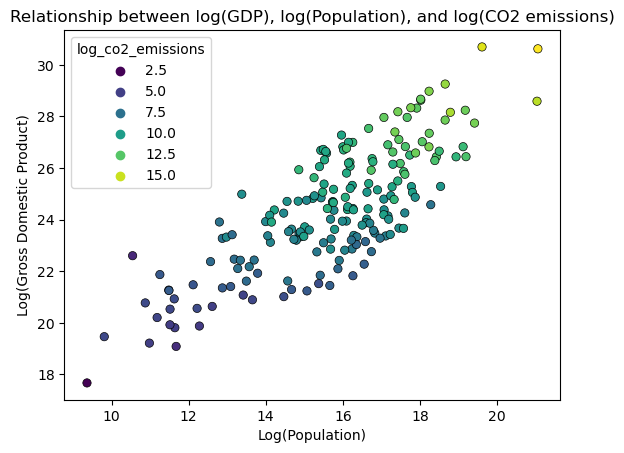

In [28]:
# scatterplot log(gdp) vs. log(population), with color representing log(co2 emissions)
sns.scatterplot(
    data=countries,
    x='log_population',
    y='log_gdp',
    hue='log_co2_emissions',
    palette='viridis',
    edgecolor='black'
)

plt.title("Relationship between log(GDP), log(Population), and log(CO2 emissions)")
plt.xlabel("Log(Population)")
plt.ylabel("Log(Gross Domestic Product)")
plt.show()


#### This plot looks good, but an interactive plot to identify countries by hovering would be better. Let's use Plotly to do this.

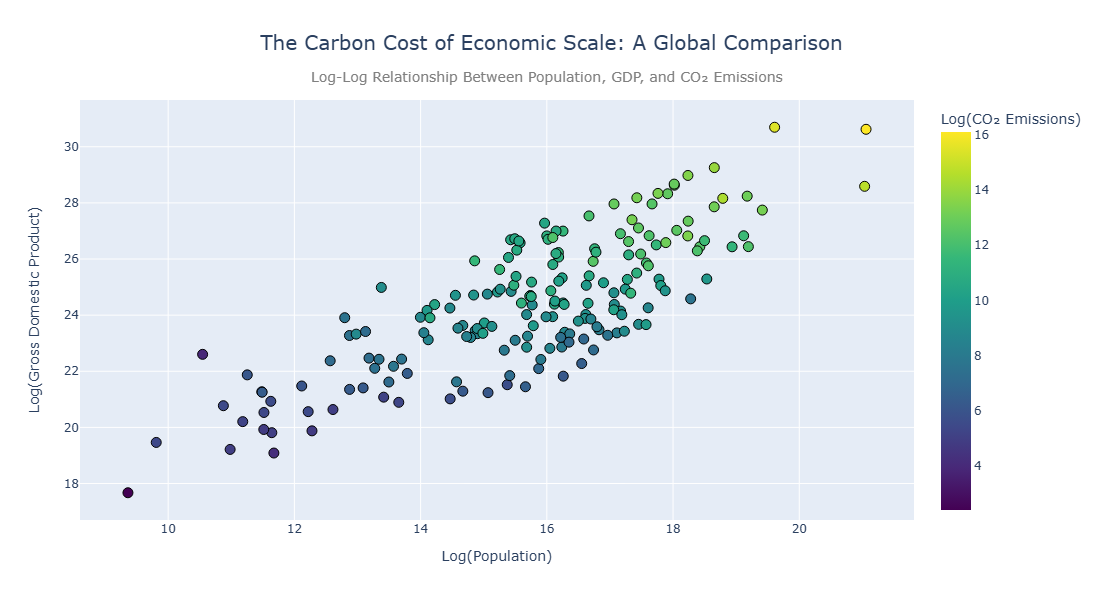

In [29]:
# set up scatterplot in plotly
fig = px.scatter(
    countries,
    x='log_population',
    y='log_gdp',
    color='log_co2_emissions',
    hover_name='country',
    color_continuous_scale='viridis',
    title='The Carbon Cost of Economic Scale: A Global Comparison',
    labels={
        'log_population': 'Log(Population)',
        'log_co2_emissions': 'Log(CO₂ Emissions)',
        'log_gdp': 'Log(Gross Domestic Product)'
    },
)
# customize the layout
fig.update_layout(  
    
    # Set custom figure size
    width=1000, height=600,
    
    # Center the title
    title=dict(  
        x=0.5,  
        xanchor='center',
        font=dict(size=20)
    ),
    
    # Subtitle placed directly below the title
    annotations=[
        dict(
            text="Log-Log Relationship Between Population, GDP, and CO₂ Emissions",
            x=0.56,
            y=1.08,
            xanchor='center',
            xref='paper',
            yref='paper',
            showarrow=False,
            font=dict(size=14, color='gray'),
            align='center'
        )
    ]
)

# set marker size and add black borders to markers
fig.update_traces(
    marker=dict(
        size=10,  # Size in pixels
        line=dict(color='black', width=1)
    )
)

fig.show()

#### The above is an interactive scatterplot but cannot be rendered on GitHub. Check out the interactive scatterplot [here](https://mcfeenix.github.io/Exploratory-Data-Analysis-with-Python/plotly_scatter.html).
#### The plot demonstrates that countries with higher log(GDP) and log(Population) also tend to exhibit higher log(CO₂ Emissions), suggesting a strong interdependence among these variables.

In [31]:
# save the scatterplot to a .html file
fig.write_html("plotly_scatter.html")